<h2>Fuzzy - Exemplo de implementação de gorjetas</h2>

<h5><strong>Antecedentes (Entradas)</h5></strong>

*Serviço:* Que nota você daria para o serviço, em uma escala de 0 a 10?
+ Ruim, Aceitavel, Ótimo

*Qualidade da comida:* Quão boa estava a comida, em uma escala de 0 a 10?
+ Ruim, Boa, Saborosa

<h5><strong>Consequentes (Saída)</h5></strong>

*Gorjeta:* Quanta gorjeta você daria, entre 0% e 20%?
+ Baixa, Média, Alta

**Regras:**
+ Se a qualidade da comida for <u>*ruim*</u> ou o serviço for <u>*ruim*</u> então a gorjeta será <u>*baixa*</u>;
+ Se o serviço for <u>*médio*</u>, então a gorjeta será <u>*médio*</u>;
+ Se o serviço for <u>*bom*</u> e a qualidade da comida for <u>*boa*</u>, então a gorjeta será <u>*alta*</u>.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

<h3>Antecedentes e Consequente

In [2]:
# CRIAÇÃO DOS ANTECEDENTES
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade') # Vamos definir a escala da qualidade, sendo de 0 a 10, passando de 1 em 1.
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

# Antecedent(universo(escala), nome da variavel)

In [3]:
# CRIAÇÃO DO CONSEQUENTE - RESULTADO
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

<H3>Membership Functions

In [4]:
# Essa função vai mapear cada um dos universos, de cada uma das funções, nas categorias abaixo.
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitavel', 'otimo'])

In [ ]:
qualidade.view()
servico.view()

In [ ]:
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20])
gorjeta.view()
# Aqui estou definindo a posição inicial¹, meio² e o fim³. 
# Porem seguindo o parametro do universo definido anteriormente.
# fuzz.trimf(gorjeta.universe, [1, 2, 3])

c:\Users\biel_\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


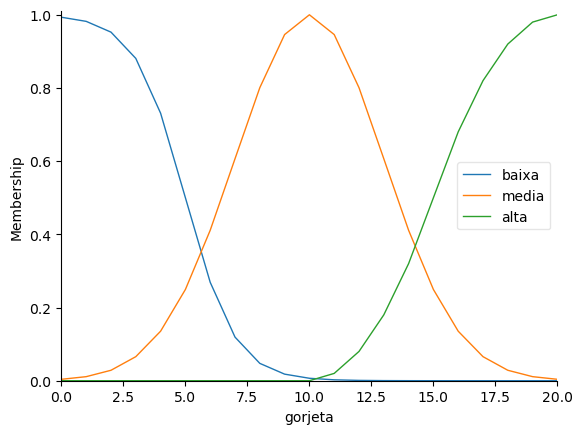

In [19]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1) # Função sigmoid, o valor -1 representa onde ele irá começar, ja o valor 5 representa onde ele irá decair a sigmoide.
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3) # Função Gaussiana, o valor 10 representa o ponto central do grafico, e o 3 representa o quão achatado ele ficará
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 25, 50) 
# Função Pi, no qual o A representa onde começa, B representa o teto, C onde vai começar a decair do numero 1, por fim o D representa o ponto mais baixo dessa função.
gorjeta.view()

In [20]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa']) # A regra esta definindo a seguinte questão: se a QUALIDADE for ruim OU o SERVIÇO for ruim, então a GORJETA será baixa.
regra2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra3 = ctrl.Rule(servico['otimo'] | qualidade['saborosa'], gorjeta['alta'])

<h3>Sistema de Controle

In [21]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [22]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [31]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()

17.06666666666667


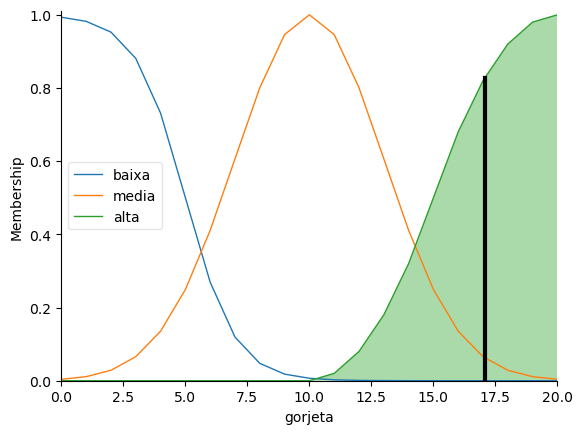

In [32]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)